# Part 1: K-means 
First, watch the three provided video's by Andrew Ng.

## Implementing the algorithm
The goal of *K-means* is to find $k$ clusters, or groups, within a dataset. 
The pseudo-code for the algorithm to find $k$ clusters, is shown here:

* Initialize $m_i$, $i$ = $1$, ... , $k$, for example, to $k$ random $x^t$
* Until $m_i$ converges:
    * For all $x^t \in X$
        * $b_i^t \leftarrow \left\{\begin{array}{ll} 1 & if\ \Vert x^t − m_i \Vert \ =\ min_j\ \Vert x^t − m_j \Vert\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $m_i$, $i$ = $1$, ... , $k$
        * $m_i \leftarrow \sum_t b_i^t x^t / \sum_t b_i^t$
        
Or in text:

* Initialize the means
* While not converged:
    * Get the new cluster assignment
    * Get the new cluster mean

For your code, we will start making **functions** for each of the following components of the k-means algorithm:

* `init_clusters`: Randomly initialize means from the data
* `distance`: Compute the distance between 2 vectors
* `cluster_assignment`: Compute the matrix $b$ containing the assignments of points to clusters, based on the current means 
* `compute_means`: Compute the matrix $m$ containing the computed mean vectors, based on the current assignment of clusters 
* `plot_clusters`: Plot the means (as x's) and their assigned points (as dots), with a different color for each cluster (here you may assume the points will all be 2-dimensional, to allow them to be plotted)
* `is_converged`: Determine if the algorithm has converged based on the sets of current and new means
* `kmeans`: Combine all these functions in a general k-means function

To test the code, you will be making use of the iris dataset, which is imported in the cell below. 

In [3]:
%matplotlib inline

import math
import matplotlib.pylab as plt
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:, 2:]

### `init_clusters`

This function should randomly initialize `k` means from the `data`. You can find your own solution, or use Andrew Ng's solution from the video on "Random Initialisation".

In [4]:
def init_clusters(data, k):
    ### YOUR SOLUTION HERE
    return np.random.permutation(data)[:k, :]

In [5]:
assert init_clusters(data, 1).shape == (1,2)
assert init_clusters(data, 4).shape == (4,2)
assert init_clusters([[1,2,3], [3, 2, 1]], 2).shape == (2, 3)

### `euc_dist` 

This function should compute the euclidean distance between 2 $N$-dimensional vectors `p` and `q`. The euclidean distance $d$ between vector $p$ and vector $q$ with $N$ dimensions is defined as:

$$ d(p,q) = \sqrt{\sum^N_{i=1}(p_i - q_i)^2} $$

In [6]:
def euc_dist(p, q):
    ### YOUR SOLUTION HERE
    return math.sqrt(np.sum(np.square(p - q)))

In [7]:
assert euc_dist(np.array([3, 3]), np.array([1, 3])) == 2
assert euc_dist(np.array([4, 2]), np.array([5, 1])) == math.sqrt(2)
assert euc_dist(np.array([1, 2, 3]), np.array([3, 2, 1])) == math.sqrt(8)

### `cluster_assignment`
Compute the matrix $b$ containing the assignments of `data` to clusters, based on the current cluster `means` and a given `dist_func`. This means that for every `point` in `data`, you should find the nearest cluster `mean`. The output is expected to be in _"one-hot"_ format, which means that for 4 datapoints, and 3 cluster means, the output should look like:

\[\[1, 0, 0\],
  \[0, 1, 0\],
  \[0, 1, 0\],
  \[0, 0, 1\]\]
 
This means that point 0 was assigned to cluster 0, point 1 was assigned to cluster 1, point 2 was assigned to cluster 1, and point 3 was assigned to cluster 2. 

Essentially, we want to have a row for every 'point' in 'data', where every row contains only one "1" on the colum that indicates its nearest cluster mean.

In [8]:
def cluster_assignment(data, means, dist_func):
    ### YOUR SOLUTION HERE
    b = np.zeros((data.shape[0], means.shape[0]), dtype=float)
    for t, elem in enumerate(data):
        b[t][np.argmin([dist_func(elem, m) for m in means])] = 1
    return b

In [9]:
means = np.array([[0, 0], [999999, 999999]])

assert cluster_assignment(data, means, euc_dist).shape == (len(data), len(means)), "The output has the incorrect shape. It should have shape (len(data), len(means))."
assert np.sum(cluster_assignment(data, means, euc_dist), axis=0)[0] == 150, "Not everything was assigned to cluster 0."
assert np.allclose(np.ones((len(data), 1)), np.sum(cluster_assignment(data, means, euc_dist), axis=1)), "There are rows with more than or less than one \"1\""

means = np.array([[4.2, 1.3], [5.6, 2.2], [1.7, 0.2], [5.,  1.5], [4.6, 1.4]])

assert cluster_assignment(data, means, euc_dist).shape == (len(data), len(means)), "The output has the incorrect shape. It should have shape (len(data), len(means))."
assert np.sum(cluster_assignment(data, means, euc_dist)) == 150, "Not everything was assigned to a cluster."
assert np.allclose(np.ones((len(data), 1)), np.sum(cluster_assignment(data, means, euc_dist), axis=1)), "There are rows with more than or less than one \"1\""
assert np.allclose(cluster_assignment(data, means, euc_dist), np.array([[0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.]])), "Points were not properly assigned to the closest cluster mean."

### `compute_means` 
Compute the matrix $m$ containing the new computed mean vectors, based on the current assignment of clusters `b`. Use `b` to get all the `points` in `data` that are assigned to one cluster, and average the values to get the new cluster mean.

Note that it is possible that there is a cluster with no assigned points. When this is the case, it is impossible to calculate a new mean, so instead, use the value of a random point from `data` as this clusters' mean. This way, the next iteration in the k-means algorithm will assign at least one point to this cluster.

In [10]:
def compute_means(data, b):
    ### YOUR SOLUTION HERE
    means = []
    for i in range(b.shape[1]):
        s = np.sum(b[:, i])
        if s == 0:
            means.append(init_clusters(data, 1)[0])
        else:
            means.append(np.sum(data[b[:, i] == 1, :], axis=0) / s)
    return np.array(means)

In [11]:
assert compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [0, 1]])).shape == (2, 3), "The output shape of your function is incorrect."
assert np.allclose(compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [0, 1]])), np.array([[0.5, 2.5, 1.5], [1, 0, 1]])), "The computed means are incorrect."

b = np.array([[0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,0.,0.,0.,1.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [1.,0.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,0.,1.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.], [0.,1.,0.,0.,0.], [0.,1.,0.,0.,0.], [0.,0.,0.,1.,0.]])

assert np.allclose(compute_means(data, b), np.array([[3.92222222, 1.1962963], [5.79142857, 2.12857143], [1.462, 0.246], [5.00526316, 1.74736842], [4.57368421, 1.45263158]])), "The computed means are incorrect."

assert compute_means(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), np.array([[1, 0],[1, 0], [1, 0]]))[1] in  np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), "The compute_means function does not properly handle clusters that have no assigned points."

### `plot_clusters`
Plot the `means` (as x's) and their assigned points (as dots), with a different color for each cluster (here you may assume the points will all be 2-dimensional, to allow them to be plotted).

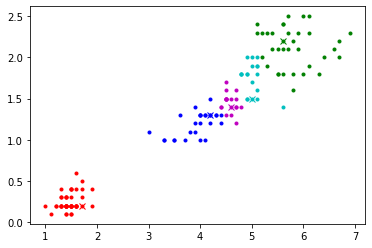

In [12]:
def plot_clusters(data, b, means):
    ### YOUR SOLUTION HERE
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    for i in range(b.shape[1]):
        a = b[:, i] == 1
        plt.plot(data[a, 0], data[a, 1], '.'+colors[i])
    for i in range(means.shape[0]):
        plt.plot(means[i, 0], means[i, 1], 'x'+colors[i])
    plt.show()
    ### END SOLUTION

plot_clusters(data, b, means)

### `is_converged`
Determine if the algorithm has converged based on the sets of `old` and `new` cluster means. 

In [13]:
def is_converged(old, new):
    ### YOUR SOLUTION HERE
    return np.allclose(old, new)

In [14]:
assert is_converged(np.array([[1, 0]]), np.array([[1, 0]])), "Incorrect output for two equal mean matrices."
assert is_converged(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[1, 0, 0], [0, 1, 0]])), "Incorrect output for two equal mean matrices."
assert is_converged(means, means), "Incorrect output for two equal mean matrices."
assert not is_converged(np.array([[1, 0]]), np.array([[0, 1]])), "Incorrect output for two unequal mean matrices."

### `kmeans`
Combine all these functions in a general k-means function. Recall the pseudocode we have shown at the start:

* Initialize $m_i$, $i$ = $1$, ... , $k$, for example, to $k$ random $x^t$
* Until $m_i$ converges
    * For all $x^t \in X$
        * $b_i^t \leftarrow \left\{\begin{array}{ll} 1 & if\ \Vert x^t − m_i \Vert \ =\ min_j\ \Vert x^t − m_j \Vert\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $m_i$, $i$ = $1$, ... , $k$
        * $m_i \leftarrow \sum_t b_i^t x^t / \sum_t b_i^t$

Or in text:

* Initialize the means
* While not converged
    * Get the new cluster assignment
    * Get the new cluster mean
    
At the end of the function, return the resulting cluster `means`.

In [15]:
def kmeans(data, k, dist_func):
    ### YOUR SOLUTION HERE
    means = init_clusters(data, k)
    old_means = means + 1
    
    while not is_converged(old_means, means):
        old_means = means
        b = cluster_assignment(data, means, dist_func)
        means = compute_means(data, b)    
        
    return means

In [16]:
assert kmeans(data, 3, euc_dist).shape == (3, data.shape[1]), "Your output has the incorrect shape."
assert kmeans(data, 12, euc_dist).shape == (12, data.shape[1]), "Your output has the incorrect shape."
assert np.all([mean in np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]) for mean in kmeans(np.array([[1, 3, 0], [0, 2, 3], [1, 0, 1]]), 3, euc_dist)]), "Your function assigns incorrect means"

## Showing the results

To show that your code works, run parts of the algorithm on the Iris dataset using `data`; use $k=3$ and plot the means with their assignments using `plot_clusters`. 

Start with the random means and then show at least 2 steps (just copy the code from your `kmeans` function), to show the means moving as the algorithm iterates. 

Finally, show the resulting plot where the means have converged and the algorithm has stopped.

Iteration:  0


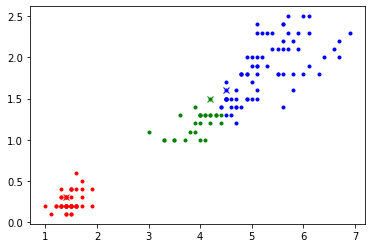

Iteration:  1


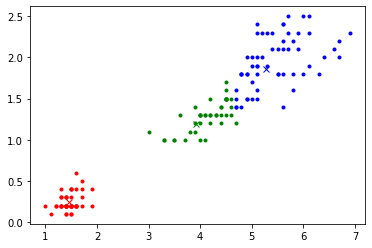

Iteration:  2


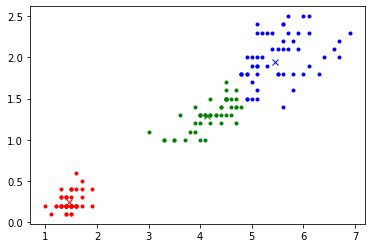

Converged Result


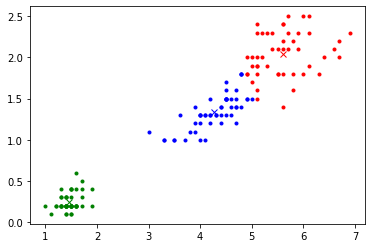

In [19]:
### YOUR SOLUTION HERE
means = init_clusters(data, 3)
for i in range(3):
    print("Iteration: ", i)
    b = cluster_assignment(data, means, euc_dist)
    plot_clusters(data, b, means)
    means = compute_means(data, b)
    
print("Converged Result")
means = kmeans(data, 3, euc_dist)
b = cluster_assignment(data, means, euc_dist)
plot_clusters(data, b, means)

# Part 2: Distance metrics

In previous exercises (including this one) we have always used Euclidean distance, also known as the straight line distance, as our distance metric. However, there are more distance metrics that can be used that give different results and that might be preferable over the Euclidean distance when using specific types of data. 

An important note here is that there are two ways of looking at this problem. You could look at how similar two vectors are, or you could look at how distant or dissimilar two vectors are. For the former, values get higher when vectors are more similar, while for the latter, the values get higher when vectors are less similar. While similarity values lie between 0 and 1, distance measures can be zero or any positive value. A distance measure can be converted to a similarity measure fairly easily:

$$ similarity = \frac{1}{1+distance} $$

And the other way around:

$$ distance = \frac{1}{similarity} - 1$$

In this part of the exercise we will implement a couple of these distance metrics and then see the effects it has on the clusters in the K-means algorithms. 

**The goal here is to program each of the distance functions without using `for`-loops.**

### Manhattan distance

The manhattan distance is ([also known as the "taxicab distance" or the "city block distance"](https://en.wikipedia.org/wiki/Taxicab_geometry)) defined as:

$$ d(p,q) = \sum^N_{i=1}abs(p_i - q_i) $$

It sums the absolute differences between the vectors $p$ and $q$ in every dimension. As an effect, the area in which something is less than $d$ away is square, not circular as it would be for the Euclidean distance.

Implement the function `man_dist` that calulates the manhattan distance between two vectors without using loops.

In [23]:
def man_dist(p, q):
    ### YOUR SOLUTION HERE
    return np.sum(np.abs(p - q))

### Mahalanobis distance

The Mahalanobis distance is a measure of the distance between a point $P$ and a distribution $D$. Its principle is based on the idea of measuring how many standard deviations $P$ is from the mean of $D$. The intuitive explanation here is that we can decide whether a given distance from the center is noteworthy or not. If the distance between the test point $P$ and the mean of the distribution $D$ is less than one standard deviation, then it is highly probable that the test point belongs to the set. If the distance is further than that, it becomes more likely that the test point should not be classified as belonging to the cluster. 

As a result, the Mahalanobis distance is scale-invariant, which means that it does not matter if one variable is scaled differently from the other(s). For example, lets say we have a dataset that contains weight (in kilograms) and length (in meters) of several people, and we would want to find clusters herein. Both Manhattan distance and Euclidean distance would have troubles with this dataset, as the length of a person is considered equally as important as the weight of a person, while in reality a meter difference is much more important than a kilogram difference.

The formula for the Mahalanobis distance (assuming that $p$ and $q$ are from the same distribution) is:

$$ d(p, q) = \sqrt{(p - q)^TS^{-1}(p - q)} $$

Where $S$ is the covariance matrix of the distribution. In our case, we do not know whether $p$ and $q$ are technically from the same distribution, but we can treat our entire dataset as if it is a single distribution. 

Implement 

### Cosine similarity

In practice, a measure that is often used for comparing different items is cosine similarity. To determine the cosine similarity you draw vectors from the origin to the datapoints, and take the angle between the vectors:

$$ cos(p, q) = \frac{\sum^N_{i=1}p_i * q_i}{\sqrt{\sum^N_{i=1}p_i^2} * \sqrt{\sum^N_{i=1}q_i^2}} $$

You've already seen this explained in SOWISO in a slightly other shape, which is rewritten here to fit our notation:

$$ cos(p, q) = \frac{p \cdot q}{\lvert\lvert p \rvert\rvert \cdot \lvert\lvert q \rvert\rvert} $$

As a recap: Cosine similarity calculates the angle difference between two vectors, while dot product cares about angle and magnitude. If you normalize your data to have the same magnitude, the two are indistinguishable. In our case, we make the magnitude $1$, and as a result we can use the dot product. Again, this means that the distance from the origin, or between two datapoints, is not important, but the angle as observed from the origin is.

First implement the function `sim_to_dist` that can convert a similarity measure to a distance measure. Then, implement the function `angle_dist` that calculates the cosine similarity of two vectors, then converts that similarity to a distance using `sim_to_dist`, and finally returns the distance.

In [2]:
def sim_to_dist(similarity):
    ### YOUR SOLUTION HERE
    return (1 / similarity) - 1

def angle_dist(p, q):
    ### YOUR SOLUTION HERE
    return sim_to_dist(p.dot(q) / np.linalg.norm(p).dot(np.linalg.norm(q)))

### Mean centering

The problem with cosine similarity is that it is highly sensitive to bias in the data. Lets say that our point cloud is translated by 100 in all dimensions. Now, the similarity of each point is suddenly much smaller, as the angle between the points as observed from the origin has become smaller. What is often done to remedy this problem is _mean centering_. Mean centering or zero-centering is the act of subtracting a variable’s mean from all observations of that variable in the dataset such that the variable’s new mean is zero. Cosine similarity that is applied on a mean centered dataset is also called adjusted cosine similarity. 

Implement the function `center_data` that accepts a dataset and returns the same dataset, but mean centered.

In [ ]:
def center_data(data):
    ### YOUR SOLUTION HERE
    return data - np.mean(axis=1)

### BYODM

Of course it is also possible to build your own distance metric! 

Implement the function `origin_dist` that calculates the similarity of `p` and `q` depending on their distance to the origin and then transforms that similarity to a distance before returning it. Use the following function to calculate the similarity:

$$ similarity = abs(\sqrt{\sum^N_{i=1}p_i^2} - \sqrt{\sum^N_{i=1}q_i^2}) $$

or...

$$ similarity = abs(\lvert\lvert p \rvert\rvert - \lvert\lvert q \rvert\rvert) $$

In [3]:
def origin_dist(p, q):
    ### YOUR SOLUTION HERE
    return np.linalg.norm(p) - np.linalg.norm(q)

# Part 3: elbow method

For this dataset we have the benefit that it is possible to see the correct number of clusters (either 2 or 3 clusters). However, even if the number clusters is not known or set before hand, there are ways to solve the clustering problem. One such possbile approach is the *elbow method*. If you have not watched the video on "Choosing the number of clusters" from Andrew Ng, please do so before continuing.

Now extend your implementation to include the following:

* `cost`: Create a sensible cost function that is minimized when steps of the algorithm are done. Use the data and the current values of $b$ and $m$.
* `average_cost`: Create a function to compute the converged cost of a specific value of $k$ repeatedly and averaging this.
* Compute the average cost for k values $1$ to $10$ and combine them in a plot. Briefly discuss if this plot corresponds with your expectations.

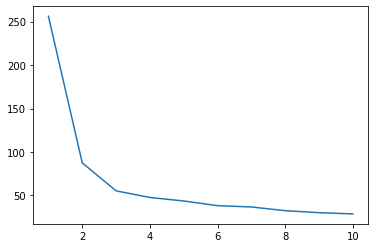

In [22]:
def cost(data, means, b, dist_func):
    ### YOUR SOLUTION HERE
    c = 0
    for i in range(means.shape[0]):
        c += sum([dist_func(means[i, :], elem) for elem in data[b[:, i] == 1, :]])
    return c

def average_cost(data, k, n, dist_func):
    ### YOUR SOLUTION HERE
    c = 0
    for i in range(n):
        m = kmeans(data, k, dist_func)
        b = cluster_assignment(data, m, dist_func)
        c += cost(data, m, b, dist_func)
    return c / n

### YOUR SOLUTION HERE
k_vals = range(1, 11)
c_vals = []
for k in k_vals:
    c_vals.append(average_cost(data, k, 10, euc_dist))

plt.plot(k_vals, c_vals)
plt.show()